<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). 
Translated and edited by [Maxim Keremet](https://www.linkedin.com/in/maximkeremet/), [Artem Trunov](https://www.linkedin.com/in/datamove/), and [Aditya Soni](https://www.linkedin.com/in/aditya-soni-0505a9124/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #2. Fall 2018 <br> Exploratory Data Analysis (EDA) of US flights <br> (using Pandas, Matplotlib & Seaborn)

<img src='../../img/plane_sunset.png' width=50%>

Prior to working on the assignment, you'd better check out the corresponding course material:
 - [Visualization: from Simple Distributions to Dimensionality Reduction](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_visual_data_analysis.ipynb?flush_cache=true)
 - [Overview of Seaborn, Matplotlib and Plotly libraries](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_additional_seaborn_matplotlib_plotly.ipynb?flush_cache=true)
 - first lectures in [this](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX) YouTube playlist 

### Your task is to:
 - write code and perform computations in the cells below
 - choose answers in the [webform](https://docs.google.com/forms/d/1qSTjLAGqsmpFRhacv0vM-CMQSTT_mtOalNXdRTcdtM0/edit)
 - submit answers with **the very same email and name** as in assignment 1. This is a part of the assignment, if you don't manage to do so, you won't get credits. If in doubt, you can re-submit A1 form till the deadline for A1, no problem
 
### <center> Deadline for A2: 2018 October 21, 20:59 CET



In [3]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt
import os, sys

* Download the data [archive](http://stat-computing.org/dataexpo/2009/2008.csv.bz2) (Archived ~ 114 Mb, unzipped - ~ 690 Mb). No need to unzip - pandas can unbzip on the fly.
* Place it in the "../../data" folder, or change the path below according to your location.
* The dataset has information about carriers and flights between US airports during the year 2008. 
* Column description is available [here](http://www.transtats.bts.gov/Fields.asp?Table_ID=236). Visit this site to find ex. meaning of flight cancellation codes.

**Reading data into memory and creating a Pandas _DataFrame_ object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them suitable data types.

In [4]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 'Cancelled': np.uint8, 
         'Year': np.uint16, 'FlightNum': np.uint16 , 'Distance': np.uint16, 
         'UniqueCarrier': str, 'CancellationCode': str, 'Origin': str, 'Dest': str,
         'ArrDelay': np.float16, 'DepDelay': np.float16, 'CarrierDelay': np.float16,
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 'SecurityDelay': np.float16,
         'LateAircraftDelay': np.float16, 'DepTime': np.float16}
print(os.getcwd())

/Users/dmastr/Google Диск/LovePlanet/ML


In [6]:
%%time
# change the path if needed
path = '../../../Downloads/ML_data/2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 1min 25s, sys: 4.98 s, total: 1min 30s
Wall time: 1min 35s


**Check the number of rows and columns and print column names.**

In [23]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 20)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Date'],
      dtype='object')


** Calculate date column from year, month and day **

**Print first 5 rows of the dataset.**

In [34]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0,2008-01-03


**Transpose the frame to see all features at once.**

In [9]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


**Examine data types of all features and total dataframe size in memory.**

In [10]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


**Get basic statistics of each feature.**

In [11]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


**Count unique Carriers and plot their relative share of flights:**

In [12]:
flights_df['UniqueCarrier'].nunique()

20

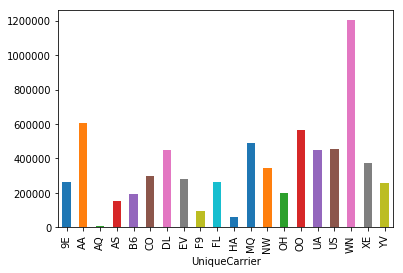

In [13]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [14]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

**Another way:**

In [35]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

**Number of flights by days of week and months:**

In [16]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**It can also be handy to color such tables in order to easily notice outliers:**

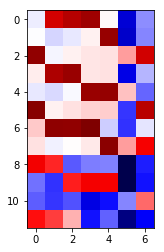

In [17]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

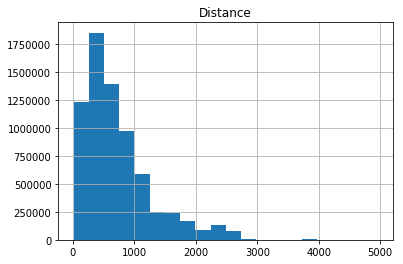

In [18]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [19]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [20]:
num_flights_by_date = flights_df.groupby('Date').size()

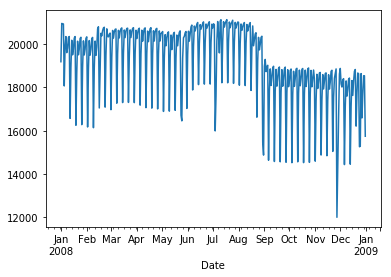

In [21]:
num_flights_by_date.plot();

**Do you see a weekly pattern above? And below?**

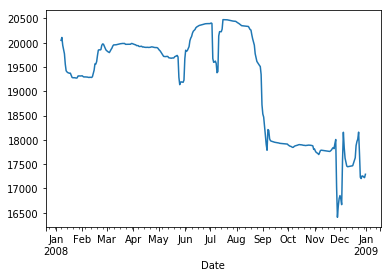

In [22]:
num_flights_by_date.rolling(window=7).mean().plot();

**1. Find top-10 carriers in terms of the number of completed flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**
- DL
- AA
- OO
- EV 

In [36]:
# You code here
flights_df[flights_df["Cancelled"]==0].\
    groupby("UniqueCarrier").size().nlargest(10)

UniqueCarrier
WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
dtype: int64

**2. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**
- carrier
- weather conditions 
- National Air System
- security reasons

In [38]:
# You code here

flights_df["CancellationReason"] = flights_df["CancellationCode"]\
        .map({"A": "Carrier", "B": "Weather", 
              "C": "National Air System", "D": "Security"})
flights_df["CancellationReason"].value_counts()

Weather                54904
Carrier                54330
National Air System    28188
Security                  12
Name: CancellationReason, dtype: int64

**3. Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 

 - New-York – Washington
 - San-Francisco – Los-Angeles 
 - San-Jose – Dallas
 - New-York – San-Francisco

In [121]:
# You code here
#flights_df["Route"] = flights_df.apply(lambda['Origin'] + + flights_df['Dest']
flights_df[flights_df["Cancelled"].isin((0, ))]\
         .groupby(['Origin', 'Dest']).size()\
         .sort_values(ascending=False).head()

Origin  Dest
SFO     LAX     13299
LAX     SFO     12935
OGG     HNL     12137
HNL     OGG     11777
LAX     LAS     11561
dtype: int64

**4. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

- 449 
- 539 
- 549 
- 668 

In [122]:
# You code here
top_delayed = flights_df\
         .groupby(['Origin', 'Dest'])\
         .agg({"DepDelay": lambda x: np.sum(x > 0),
              "WeatherDelay": lambda x: np.sum(x > 0)})\
         .sort_values(by="DepDelay", ascending=False)\
         .head()
top_delayed

,,DepDelay,WeatherDelay
Origin,Dest,,
LAX,SFO,6252.0,109.0
DAL,HOU,5744.0,133.0
SFO,LAX,5320.0,31.0
ORD,LGA,5312.0,266.0
HOU,DAL,5288.0,129.0


In [123]:
top_delayed.sum()

DepDelay        27904.0
WeatherDelay      668.0
dtype: float16

In [45]:
flights_df["is_dep_delayed"] = (flights_df["DepDelay"]>0).astype("int")

Origin  Dest
LAX     SFO     6253
DAL     HOU     5742
SFO     LAX     5322
ORD     LGA     5307
HOU     DAL     5288
Name: is_dep_delayed, dtype: int64

In [46]:
flights_df[flights_df["Cancelled"]==0]\
         .groupby(['Origin', 'Dest'])\
         ["is_dep_delayed"].sum()\
         .sort_values(ascending=False)\
         .head()

Origin  Dest
LAX     SFO     6253
DAL     HOU     5742
SFO     LAX     5322
ORD     LGA     5307
HOU     DAL     5288
Name: is_dep_delayed, dtype: int64

**5. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**

**Choose all correct statements:**
 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

In [58]:
# You code here
dep_hours = flights_df["DepTime"].dropna().apply(
                        lambda x: int(str(x)[:2] if x>999 
                                      else str(x)[:1])%24)

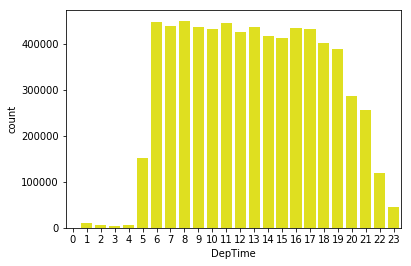

In [61]:
sns.countplot(dep_hours, color="yellow");

**6. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days).
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.  

In [73]:
# You code here
seasons = {"0Win": [12, 1, 2], 
           "2Sum": [6, 7, 8], 
           "1Spr": [3, 4, 5], 
           "3Fall": [9, 10, 11]}
seasons = {month: name for name, vals in seasons.items() for month in vals }
seasons

{12: '0Win',
 1: '0Win',
 2: '0Win',
 6: '2Sum',
 7: '2Sum',
 8: '2Sum',
 3: '1Spr',
 4: '1Spr',
 5: '1Spr',
 9: '3Fall',
 10: '3Fall',
 11: '3Fall'}

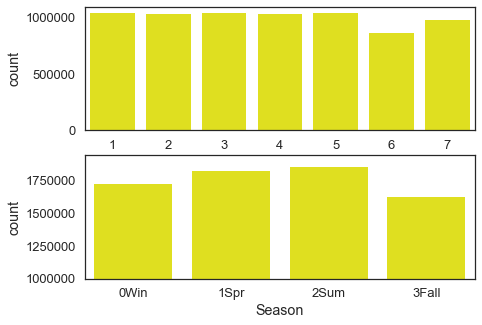

In [76]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5))
sns.countplot(flights_df["DayOfWeek"], 
              color="yellow", ax=ax1)
sns.countplot(flights_df["Month"].map(seasons), 
              color="yellow", ax=ax2)
ax1.set_xlabel("Day of the week")
ax2.set_xlabel('Season')
ax2.set_ylim(1000000)
plt.show()

In [125]:
flights_df.loc[flights_df["Cancelled"]==0, "DayOfWeek"].value_counts()


3    1019463
1    1015688
4    1014340
5    1011204
2    1008881
7     958749
6     843969
Name: DayOfWeek, dtype: int64

In [126]:
flights_df.loc[flights_df["Cancelled"]==0, "Month"].map(seasons).value_counts()

2Sum     1817511
1Spr     1787742
0Win     1664276
3Fall    1602765
Name: Month, dtype: int64

**7. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**
- December has the highest rate of cancellations due to weather. 
- The highest rate of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers.
- Flights cancellations due to National Air System are more frequent than those due to carriers.

CancellationReason,Carrier,National Air System,Security,Weather,All
Month,,,,,
1,6635,3962,0,6711,17308
2,6090,4470,2,10034,20596
3,6038,2621,4,7520,16183
4,7312,1564,0,1479,10355
5,3157,1608,3,1461,6229
6,4251,3232,0,3448,10931
7,5292,2694,0,2612,10598
8,3852,2401,0,3582,9835
9,2246,1188,1,6478,9913


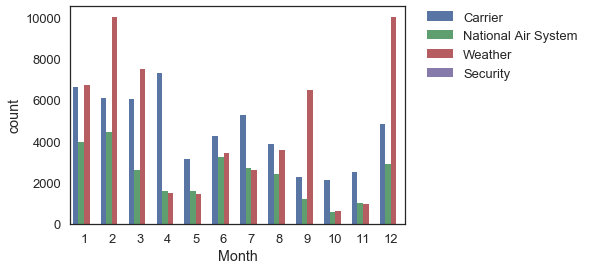

In [88]:
# You code here
fli_cancelled = flights_df[flights_df["Cancelled"]==1]
sns.countplot(x="Month", 
              hue="CancellationReason", 
              data=fli_cancelled)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pd.crosstab(fli_cancelled["Month"], 
            fli_cancelled["CancellationReason"],
           margins=True)

**8. Which month has the greatest number of cancellations due to Carrier?** 
- May
- January
- September
- April 

In [22]:
# You code here

**9. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

- 9E
- EV
- HA
- AA

In [95]:
# You code here
fli_cancelled.loc[(fli_cancelled["CancellationReason"] == "Carrier") & (fli_cancelled["Month"] == 4), 
                  "UniqueCarrier"]\
             .value_counts()\
             .head()

AA    3696
WN     533
UA     494
YV     454
9E     391
Name: UniqueCarrier, dtype: int64

**10. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
[Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile.**

- EV
- OO
- AA
- AQ 

In [99]:
delay_positive = flights_df[(flights_df["ArrDelay"] > 0) & 
                            (flights_df["DepDelay"] > 0)].dropna(subset=["ArrDelay", "DepDelay"], axis=0)

In [101]:
delay_positive[["ArrDelay", "DepDelay"]].describe(percentiles=[.5, .95])

,ArrDelay,DepDelay
count,2049000.0,2049000.0
mean,NaN,NaN
std,NaN,NaN
min,1.0,1.0
50%,23.0,22.0
95%,145.0,139.0
max,2460.0,2468.0


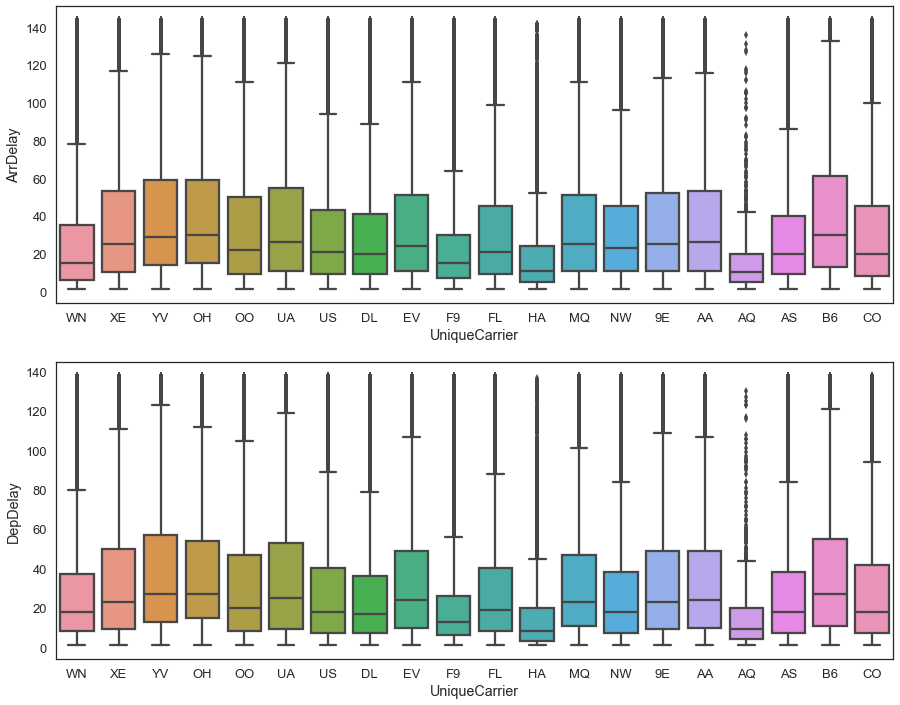

In [103]:
# You code here

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

sns.boxplot(x="UniqueCarrier", y="ArrDelay", data=delay_positive[delay_positive["ArrDelay"]<145], ax=ax1)
sns.boxplot(x="UniqueCarrier", y="DepDelay", data=delay_positive[delay_positive["DepDelay"]<139], ax=ax2)
plt.show()

In [114]:
delay_positive.groupby("UniqueCarrier")[["ArrDelay", "DepDelay"]].median().sort_values("ArrDelay")

,ArrDelay,DepDelay
UniqueCarrier,,
AQ,10.0,9.0
HA,11.0,9.0
WN,16.0,18.0
F9,16.0,13.0
AS,21.0,19.0
DL,21.0,18.0
US,22.0,19.0
CO,22.0,20.0
FL,23.0,20.0


In [117]:
delay_gr = delay_positive[["UniqueCarrier", "ArrDelay", "DepDelay"]]
delay_gr.head()
#delay_gr.plot.scatter(x="ArrDelay", y="DepDelay", c="UniqueCarrier", colormap='viridis')

,UniqueCarrier,ArrDelay,DepDelay
1,WN,2.0,19.0
2,WN,14.0,8.0
4,WN,34.0,34.0
5,WN,11.0,25.0
6,WN,57.0,67.0


## Answers
1. EV
2. weather
3. San-Francisco – Los-Angeles
4. 668
5. Flight distribution
    - Flights are normally distributed **False**
    - Flights are uniformly distributed **False**
    - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm. **True**
6. Flights over time
 - The number of flights during weekends is less than during weekdays (working days) **True**
 - The lowest number of flights is on Sunday. **False**
 - There are less flights during winter than during summer. **True**
7. Month and calcellation
 - December has the highest rate of cancellations due to weather.  **True**
 - The highest rate of cancellations in September is due to Security reasons. **False**
 - April's top cancellation reason is carriers. **True**
 - Flights cancellations due to National Air System are more frequent than those due to carriers. **False**
8. April
9. AA
10. AQ

## Problems
- q4: lambda x: sum(x>0) дает другой результат по сравеннию с тем, если сначала вычислить столбец is_delayed и затем сделать по нему сумму
